In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('assignment_1608.csv')

In [3]:
data.head(10)

,org_id,market,payment_volume_category,user_segment,nr_pos_features_used,nr_library_products,valid_volume_eur_month_6,nr_days_with_at_least_one_valid_payment_month_6
0,9b7a02f9259ba6d1e522f9b05461f4cb,Market2,nano,Retail,1,20,206.877,3
1,c61f776a5cf8c426e1225e959f685944,Market2,nano,Retail,0,37,37.422,2
2,7576add473e6c29fc7fb714506b4e47b,Market1,nano,Health Services,0,5,187.572,3
3,656a90c996d46c73c438f2279c3fcaa6,Market2,nano,Individual,1,3,0.000,0
4,b5e6cfdf349bbeb4f4042246a78b38cf,Market3,micro,Professional Services,1,7,0.000,0
5,790291696ccbd0af121b7788468d2412,Market2,micro,Organizations & Education,0,37,174.493,1
6,80169f5a03975e260d7f3bf617026263,Market1,nano,Individual,4,0,102.476,1
7,4a0f80d000e1f8c8d65d0e128f3914e5,Market2,nano,Retail,2,10,323.807,15
8,0e33d1af1ca2852a3e4e3ac31aa21870,Market3,nano,Retail,2,0,498.322,6
9,ab040018dafee568375a951224b39197,Market2,micro,Hair & Beauty,1,12,186.197,1


In [4]:
data['daily_volume']=data.valid_volume_eur_month_6 / data.nr_days_with_at_least_one_valid_payment_month_6

In [5]:
data = data.fillna(0)

### Dataframe plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111021650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114344d10>]], dtype=object)

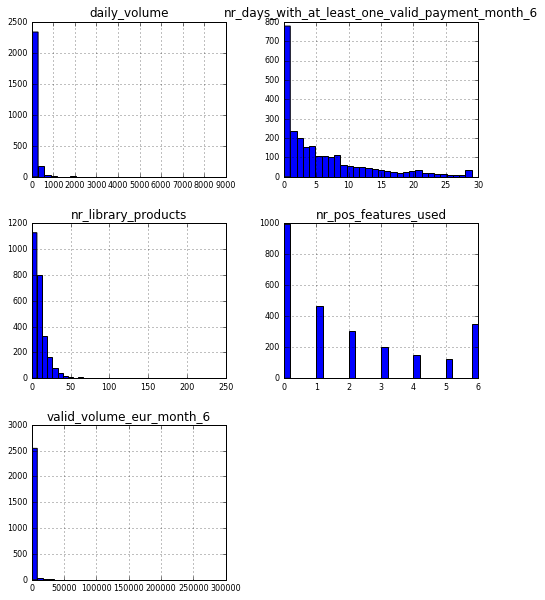

In [6]:
data.hist(figsize=(8, 10), bins=30, xlabelsize=8, ylabelsize=8)

In [7]:
data.groupby('market').describe()

daily_volume  nr_days_with_at_least_one_valid_payment_month_6  \
market                                                                         
Market1 count   1073.000000                                      1073.000000   
        mean     162.029279                                         7.043802   
        std      403.636880                                         7.951048   
        min        0.000000                                         0.000000   
        25%        0.000000                                         0.000000   
        50%       63.577250                                         4.000000   
        75%      162.833000                                        11.000000   
        max     6896.186000                                        29.000000   
Market2 count    851.000000                                       851.000000   
        mean      62.949511                                         5.316099   
        std      132.708065                                         6.501943   
        min        0.000000                                         0.000000   
        25%        0.000000                                         0.000000   
        50%       23.195857                                         3.000000   
        75%       69.709702                                         7.000000   
        max     2253.713000                                        29.000000   
Market3 count    668.000000                                       668.000000   
        mean     149.014339                                         4.306886   
        std      433.869069                                         6.018722   
        min        0.000000                                         0.000000   
        25%        0.000000                                         0.000000   
        50%       49.778667                                         1.000000   
        75%      174.253750                                         7.000000   
        max     8872.979310                                        29.000000   

               nr_library_products  nr_pos_features_used  \
market                                                     
Market1 count          1073.000000           1073.000000   
        mean             10.732526              2.496738   
        std               9.686900              2.265131   
        min               0.000000              0.000000   
        25%               4.000000              0.000000   
        50%               8.000000              2.000000   
        75%              14.000000              5.000000   
        max              82.000000              6.000000   
Market2 count           851.000000            851.000000   
        mean             11.118684              1.305523   
        std              12.294954              1.849186   
        min               0.000000              0.000000   
        25%               4.000000              0.000000   
        50%               8.000000              0.000000   
        75%              14.000000              2.000000   
        max             200.000000              6.000000   
Market3 count           668.000000            668.000000   
        mean              9.426647              1.821856   
        std               9.569552              2.061208   
        min               0.000000              0.000000   
        25%               4.000000              0.000000   
        50%               7.000000              1.000000   
        75%              12.000000              3.000000   
        max              69.000000              6.000000   

               valid_volume_eur_month_6  
market                                   
Market1 count               1073.000000  
        mean                1554.257445  
        std                 4618.497812  
        min                    0.000000  
        25%                    0.000000  
        50%                  364.683000  
        75%                 1297.6370

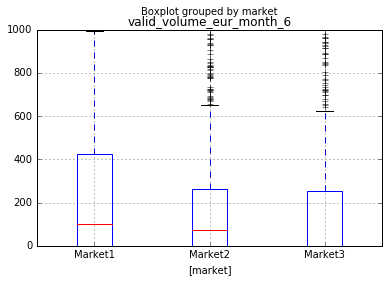

In [8]:
data[data.valid_volume_eur_month_6<1000].boxplot(by=['market'], column='valid_volume_eur_month_6')

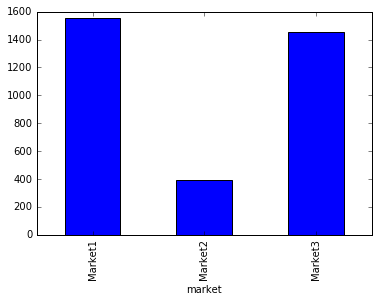

In [9]:
data.groupby('market').mean()['valid_volume_eur_month_6'].plot.bar()

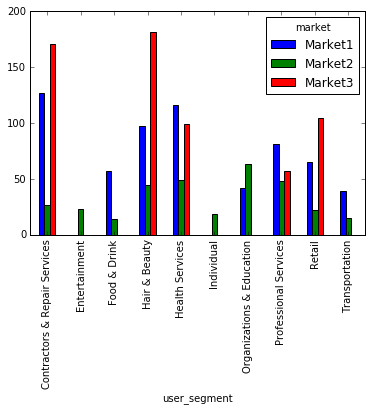

In [10]:
# valid_volume_eur_month_6 vs. segment per market

pd.pivot_table(data, index=['user_segment'], columns=['market'], 
               values= 'daily_volume', aggfunc='median').plot.bar()

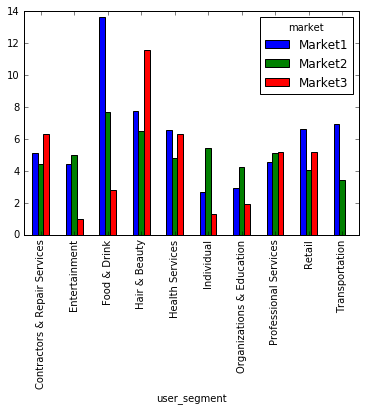

In [11]:
# Paying frequency by segment per market

pd.pivot_table(data, index=['user_segment'], columns=['market'], 
               values= 'nr_days_with_at_least_one_valid_payment_month_6', aggfunc='mean').plot.bar()

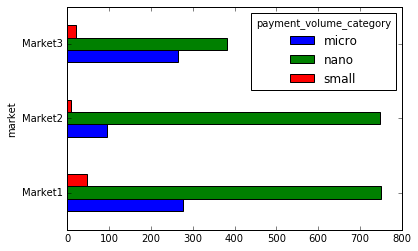

In [12]:
# count of different volume cat in each market

pd.pivot_table(data, index=['market'], columns=['payment_volume_category'], 
               values= 'org_id', aggfunc='count').plot.barh()

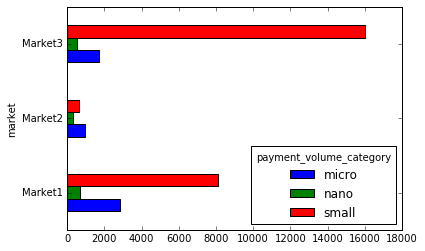

In [13]:
pd.pivot_table(data, index=['market'], columns=['payment_volume_category'], 
               values= 'valid_volume_eur_month_6', aggfunc='mean').plot.barh()

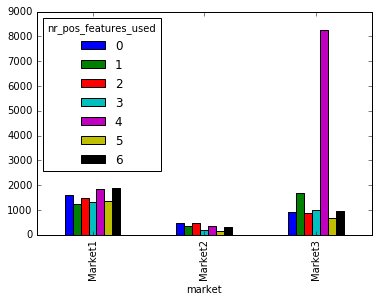

In [14]:
pd.pivot_table(data, index=['market'], columns=['nr_pos_features_used'], 
               values= 'valid_volume_eur_month_6', aggfunc='mean').plot.bar()

/Users/adonismaomao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


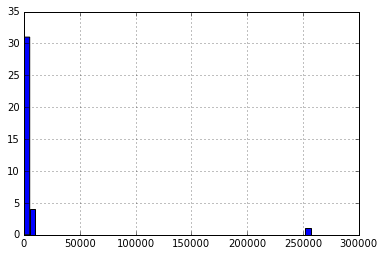

In [15]:
data[data.market=='Market3'][data.nr_pos_features_used==4]['valid_volume_eur_month_6'].hist(bins=50)

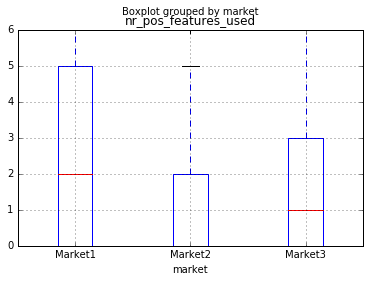

In [16]:
data.boxplot(by='market', column='nr_pos_features_used')

In [17]:
def plot_correlation_matrix(df):
    """Takes a pandas dataframe as input"""
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    
    cax = ax.matshow(df.corr())

    ticks = list(range(len(df.columns)))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ax.set_xticklabels(df.columns, rotation=20, horizontalalignment='left')
    ax.set_yticklabels(df.columns)

    plt.tight_layout()
    plt.show()

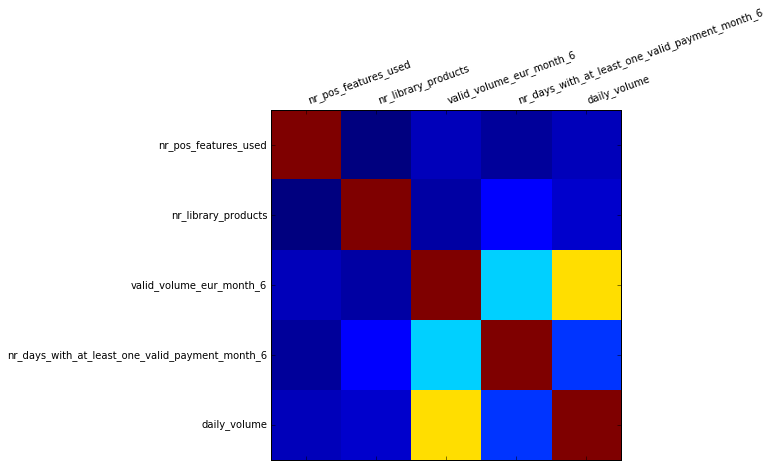

In [18]:
plot_correlation_matrix(data[data.describe().columns.tolist()])

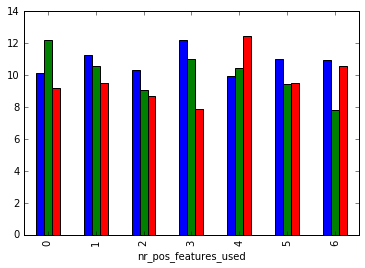

In [19]:
pd.pivot_table(data, index=['nr_pos_features_used'], columns=['market'], 
               values= 'nr_library_products', aggfunc='mean').plot.bar(legend=False)

In [20]:
# Features
cat_features = data.columns.tolist()[1:4]
num_features = ['nr_library_products', 'nr_pos_features_used']
print cat_features

['market', 'payment_volume_category', 'user_segment']


In [21]:
X_cat = pd.get_dummies(data[cat_features], prefix='is_')
X = pd.concat([X_cat, data[num_features]], axis=1)

y = data['daily_volume']

In [22]:
X.head()

,is__Market1,is__Market2,is__Market3,is__micro,is__nano,is__small,is__Contractors & Repair Services,is__Entertainment,is__Food & Drink,is__Hair & Beauty,is__Health Services,is__Individual,is__Organizations & Education,is__Professional Services,is__Retail,is__Transportation,nr_library_products,nr_pos_features_used
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20,1
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37,0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,1
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,1


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Training length: " +str(len(y_train)))
print("Test length: " +str(len(y_test)))

Training length: 2073
Test length: 519


In [24]:
regr = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=0)

In [25]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
regr.score(X_train, y_train), regr.score(X_test, y_test)

(0.28859032440848531, 0.17190697867456661)

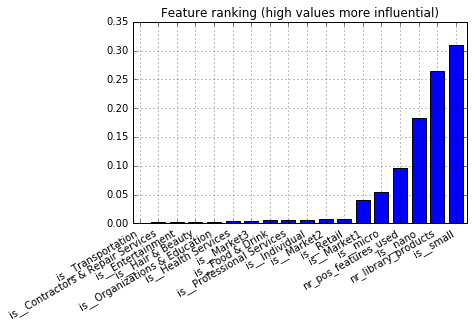

In [27]:
X_names = X.columns.tolist()
imp = regr.feature_importances_
sortNames = [y for (x,y) in sorted(zip(imp,X_names)) if x >0]
sortImp = [x for (x,y) in sorted(zip(imp,X_names)) if x >0]

fig = plt.figure()
ind = np.arange(len(sortImp))
width = .75
plt.bar(ind, sortImp, width=width)
plt.xticks(ind + width / 2, sortNames)
fig.autofmt_xdate()
plt.grid(True)
plt.title('Feature ranking (high values more influential)')
plt.show()